In [1]:
import skimage.io as skio
import skimage.color as skc
import skimage.exposure as ske
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rescale as rescale

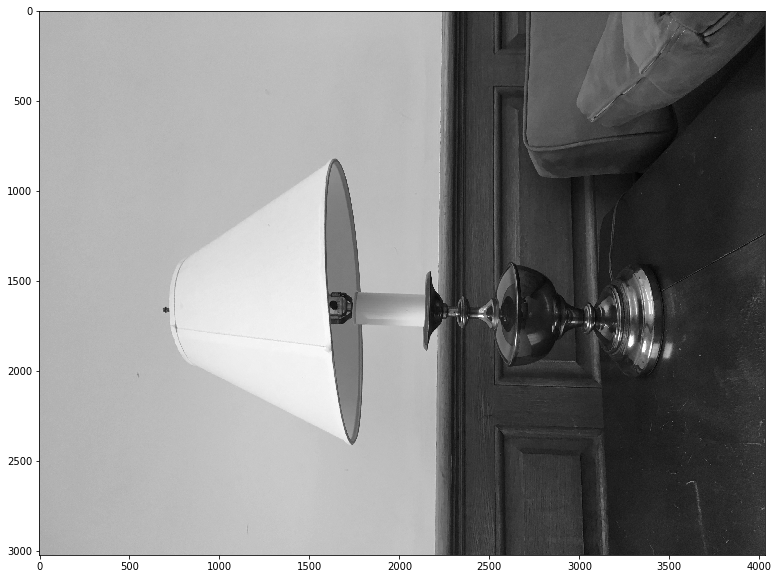

In [2]:
lamp = skio.imread('lamp.JPG')
lampg = skc.rgb2gray(lamp)
fig = plt.figure(figsize=(13,13))
plt.imshow(lampg, cmap='gray')

/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: oldhouse.png is a low contrast image
  warn('%s is a low contrast image' % fname)


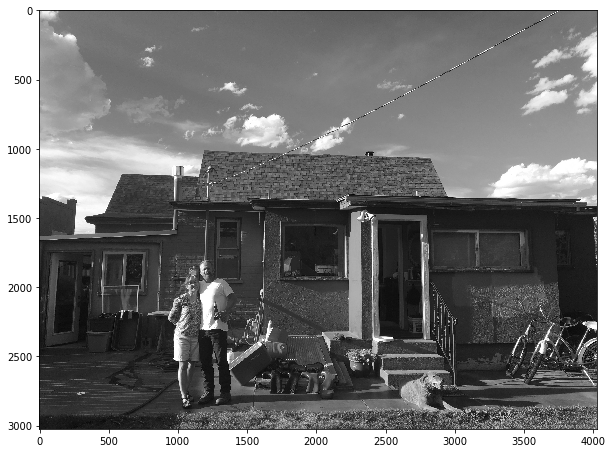

In [3]:
house = skio.imread('house.JPG')
houseg = skc.rgb2gray(house)
houseg = (houseg*255).astype(int)
skio.imsave('oldhouse.png', houseg)
fig = plt.figure(figsize=(10,10))
plt.imshow(houseg, cmap='gray')

In [4]:
def encodeGray(hidden, base, filename):
    # hidden and base are two numpy arrays
    # total number of pixels of hidden must be 1/8 of base
    hpx = hidden.shape[0] * hidden.shape[1]
    bpx = base.shape[0] * base.shape[1]
    base_shape = base.shape
    x = 2
    while(hpx > 1/8 * bpx):
        hidden_new = rescale(hidden, 1/x, anti_aliasing=True, multichannel=False)
        hpx = hidden_new.shape[0] * hidden_new.shape[1]
        x+= 1
    # unravel matrices into arrays
    hidden_new *= 255
    print("hidden shape = ", hidden_new.shape)
    print("hidden length = ", str(hpx))
    hidden = np.reshape(hidden_new, hpx)
    print("hidden[0] = ", hidden[10000])
    print("hidden[1] = ", hidden[100000])
    #base = (base*255).astype(int)
    #base = base.astype(int)
    base = np.reshape(base, bpx)
    # iterate through all elements of hidden, keep counter in base, increment for each shift in hidden
    # encode each element in hidden.shape in first 24 lowest bits of base
    hidden_shape = hidden_new.shape
    for i in range(0,2):
        for j in range(0,12):
            element = i * 12 + j
            bit = (np.right_shift(hidden_shape[i], j) & 1)
            #base[element] = np.left_shift(np.right_shift(base[element],1),1) + bit
            base[element] = ((base[element] // 2) * 2) +  bit
    # encode remaining bits in 
    count = 24
    for x in range(0, len(hidden)):
        for j in range(0,8):
            bit = (int(hidden[x]) >> j) & 1
            #base[count] = np.left_shift(np.right_shift(base[count],1),1) + bit
            base[count] = ((base[count] // 2) * 2) + bit
            count += 1
    base = np.reshape(base, base_shape)
    skio.imsave(filename, base)
    

encodeGray(lampg, houseg, 'newhouse.png')

/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


hidden shape =  (1008, 1344)
hidden length =  1354752
hidden[0] =  189.21218064522304
hidden[1] =  188.47337206230796


/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: newhouse.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Text(0.5,1,'Base Image Containing Hidden Image')

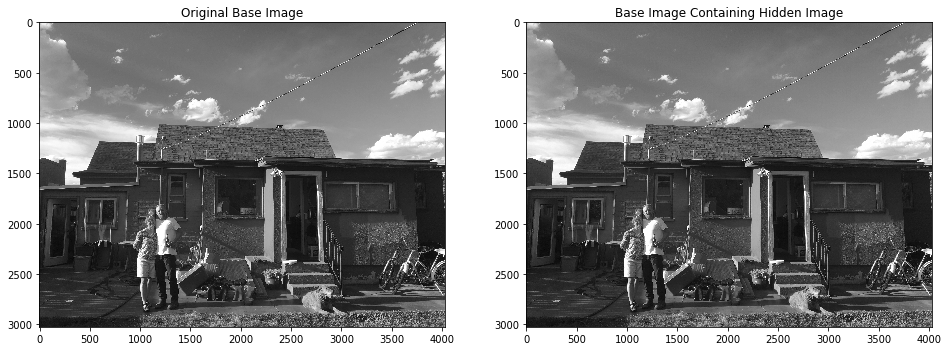

In [5]:
new_house = skio.imread('newhouse.png')
old_house = skio.imread('oldhouse.png')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,16))
ax1.imshow(old_house, cmap="gray")
ax1.set_title("Original Base Image")
ax2.imshow(new_house, cmap="gray")
ax2.set_title("Base Image Containing Hidden Image")

Text(0.5,1,'Base Image Containing Hidden Image')

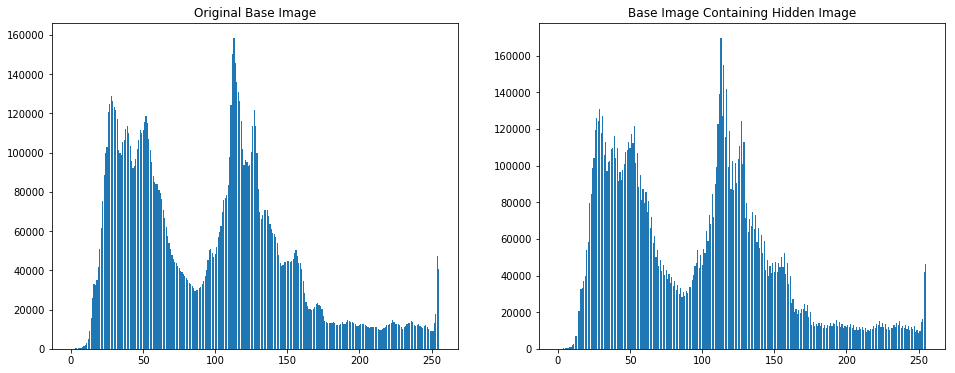

In [6]:
(cnt, binc) = ske.histogram(old_house, nbins=256)
(cntn, bincn) = ske.histogram(new_house, nbins=256)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.bar(binc, cnt)
ax1.set_title("Original Base Image")
ax2.bar(bincn, cntn)
ax2.set_title("Base Image Containing Hidden Image")

In [7]:
def decodeGray(base, filename):
    # base is a 2D numpy array
    # first 2 12 byte intervals refer to shape of the hidden image
    bpx = base.shape[0] * base.shape[1]
    base = np.reshape(base, bpx)
    shape = [0, 0]
    for i in range(0,2):
        for j in range(0,12):
            bit = base[i * 12 + j] & 1
            shape[i] = shape[i] | ((2**j)* bit)
    print("shape = ", shape)
    length = shape[0] * shape[1]
    hidden = np.zeros(length, dtype="uint8")
    # decode next length*8 bytes
    count = 0
    for x in range(24, length * 8):
            bit = base[x] & 1
            location = (x-24)//8
            hidden[location] = hidden[location] | ((2**count)*bit)
            count = (count + 1) % 8
    print("hidden[0] = ", hidden[10000])
    print("hidden[1] = ", hidden[100000])
    hidden_new = np.reshape(hidden, (shape[0], shape[1]))
    skio.imsave(filename, hidden_new)
            

decodeGray(new_house, "Hidden_image.png")

shape =  [1008, 1344]
hidden[0] =  189
hidden[1] =  188


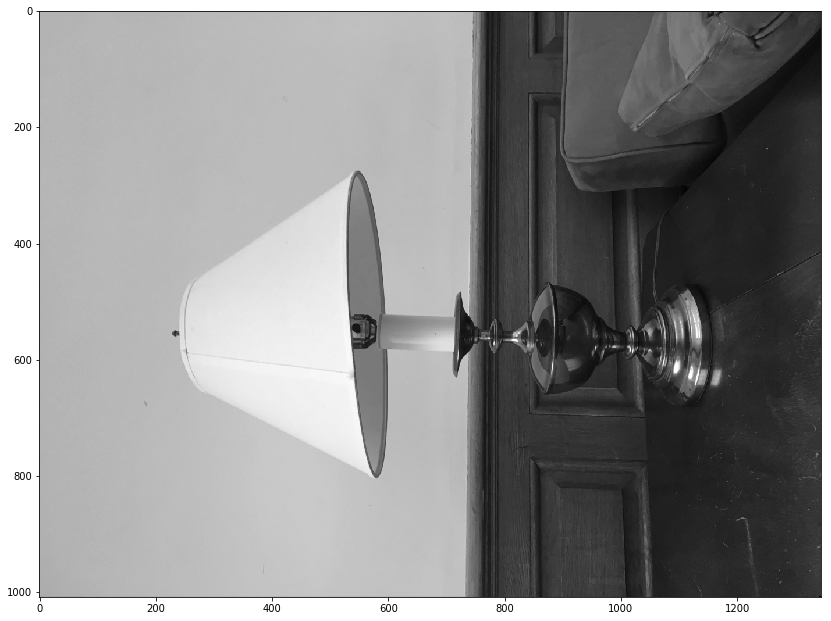

In [8]:
newlamp = skio.imread('Hidden_image.png')
fig = plt.figure(figsize=(14,14))
plt.imshow(newlamp, cmap='gray')

Text(0.5,1,'Decoded Hidden Image')

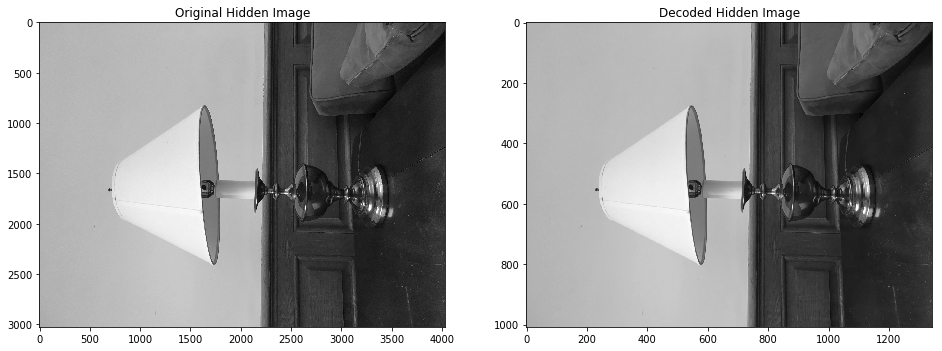

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,16))
ax1.imshow(lampg, cmap="gray")
ax1.set_title("Original Hidden Image")
ax2.imshow(newlamp, cmap="gray")
ax2.set_title("Decoded Hidden Image")